## Import library

In [1]:
# Import library

import numpy as np
import pandas as pd 
import os
import seaborn as sns 
import matplotlib.pyplot as plt


## Loading dataset

In [2]:
# Define ROOT directory:
ROOT = "E:\\python\\AnalyzeRelationships\\dataset\\TradeData"

# Loading dataset
data_import = pd.read_csv(os.path.join(ROOT, "2018-2010_import.csv"))
data_export = pd.read_csv(os.path.join(ROOT, "2018-2010_export.csv"))

## Explore dataset

In [3]:
print("Import dataset")
data_import.head(5)


Import dataset


,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018


In [4]:
print("Export dataset")
data_export.head(5)


Export dataset


,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


In [5]:
data_import.describe()

,HSCode,value,year
count,76124.000000,64536.000000,76124.000000
mean,53.905023,62.361425,2014.018299
std,27.546852,666.327177,2.579385
min,1.000000,0.000000,2010.000000
25%,30.000000,0.030000,2012.000000
50%,54.000000,0.370000,2014.000000
75%,78.000000,4.780000,2016.000000
max,99.000000,32781.570000,2018.000000


In [6]:
data_export.describe()

,HSCode,value,year
count,137023.000000,122985.000000,137023.000000
mean,51.330302,21.567829,2014.056304
std,28.018026,229.701279,2.580160
min,1.000000,0.000000,2010.000000
25%,28.000000,0.030000,2012.000000
50%,52.000000,0.360000,2014.000000
75%,74.000000,3.770000,2016.000000
max,99.000000,19805.170000,2018.000000


## Clean dataset

In [7]:
def cleanup(data_df):
    #setting country UNSPECIFIED to nan
    data_df['country']= data_df['country'].apply(lambda x : np.NaN if x == "UNSPECIFIED" else x)
    #ignoring where import value is 0 . 
    data_df = data_df[data_df.value!=0]
    data_df.dropna(inplace=True)
    data_df.year = pd.Categorical(data_df.year)
    data_df.drop_duplicates(keep="first",inplace=True)
    return data_df
data_import = cleanup(data_import)
data_export = cleanup(data_export)

d:\Applications\Anaconda\envs\DMT\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\Applications\Anaconda\envs\DMT\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
d:\Applications\Anaconda\envs\DMT\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

## Import And Export Year Wise



In [8]:
import_sum = data_import.groupby('year').agg({'value':'sum'}).reset_index()

export_sum = data_export.groupby('year').agg({'value':'sum'}).reset_index()

diff_sum = import_sum.value - export_sum.value
diff_sum

0    130033.93
1    198761.05
2    193858.35
3    143251.86
4    134304.07
5    112499.98
6    103641.56
7    155301.41
8    186830.19
Name: value, dtype: float64

In [9]:
new_data = import_sum.copy()
new_data.rename(columns={'value':'Import'}, inplace=True)
new_data['Export'] = export_sum["value"]
new_data['Difference'] = export_sum["value"] - import_sum["value"]

new_data
# diff_sum.head(-1)

,year,Import,Export,Difference
0,2010,365444.94,235411.01,-130033.93
1,2011,488272.63,289511.58,-198761.05
2,2012,488805.22,294946.87,-193858.35
3,2013,446095.99,302844.13,-143251.86
4,2014,440463.87,306159.80,-134304.07
5,2015,372291.40,259791.42,-112499.98
6,2016,377006.72,273365.16,-103641.56
7,2017,456379.59,301078.18,-155301.41
8,2018,513981.62,327151.43,-186830.19


d:\Applications\Anaconda\envs\DMT\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='value'>

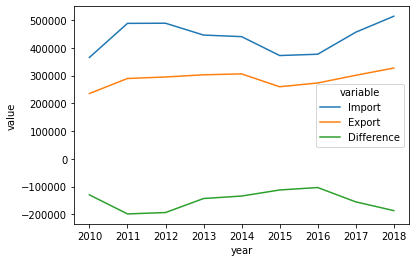

In [10]:
sns.lineplot('year', 'value', hue='variable', 
             data=pd.melt(new_data, 'year'))

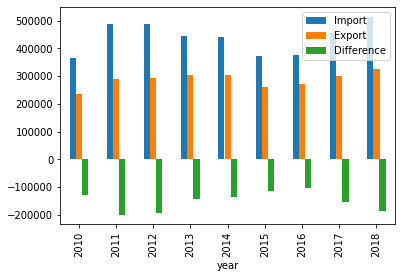

In [12]:
ax = new_data.plot(x="year", y=["Import", "Export", "Difference"], kind="bar")
plt.show()


In [19]:
data_import[data_import.year == 2018].groupby('Commodity').sum()
# data_import

,HSCode,value
Commodity,,
"AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.",4752,7615.35
ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GLUES; ENZYMES.,2135,518.03
ALUMINIUM AND ARTICLES THEREOF.,11096,5455.79
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLEAVAGE PRODUCTS; PRE. EDIBLE FATS; ANIMAL OR VEGETABLE WAXEX.,915,9994.41
ARMS AND AMMUNITION; PARTS AND ACCESSORIES THEREOF.,2604,65.49
...,...,...
"WADDING, FELT AND NONWOVENS; SPACIAL YARNS; TWINE, CORDAGE, ROPES AND CABLES AND ARTICLES THEREOF.",3248,361.23
WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.,4752,2230.28
"WOOL, FINE OR COARSE ANIMAL HAIR, HORSEHAIR YARN AND WOVEN FABRIC.",3315,384.12
